In [37]:
import numpy as np
import ot
import ot.plot
import matplotlib.pyplot as plt
from ot.datasets import make_1D_gauss as gauss

# Example of OT problem w/out optimal plan

$$ \alpha \sim \text{Uni}( \{0 \} \times [0,1]),  \beta \sim \text{Uni}( \{-1, 1 \} \times [0,1])$$
Then the optimal plan is
$$ \text d \pi (x,y) = \text d (x_1 \lfloor[0,1]) \text d \delta_0(x_2) \text d \delta_{x_1}(y_1)\frac{ \text{d}\delta_{-1}(y_2) + \text{d}\delta_{1}(y_2))}{2}$$
See also exercise 2.14 from Topics in Optimal Transport

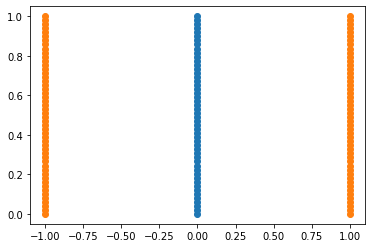

In [79]:
n = 50 # nb bins

# bin positions
x  = np.hstack( ( np.zeros((n,1)), np.linspace(0, 1, num = n).reshape(n,1) ) )
y1 = np.hstack( ( np.ones((n,1)), np.linspace(0, 1, num = n).reshape(n,1) ) )
y2 = np.hstack( ( -np.ones((n,1)), np.linspace(0, 1, num = n).reshape(n,1) ) )
y = np.vstack( (y1, y2) )
plt.scatter(x[:, 0], x[:, 1])
plt.scatter(y[:, 0], y[:, 1])
    
a = np.array([1/n] * n)
b = np.array([1/(2*n)] * 2 * n)

# loss matrix
M = ot.dist(x.reshape((n, 2)), y.reshape((2 * n, 2)))

(50,)


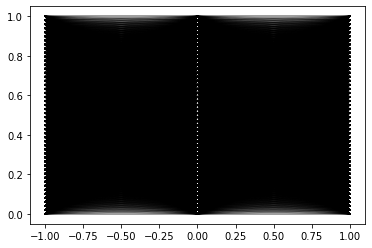

In [82]:
print(a.shape)
ot.plot.plot2D_samples_mat(x, y, M)

In [80]:
optimal_plan = ot.emd(a, b, M)

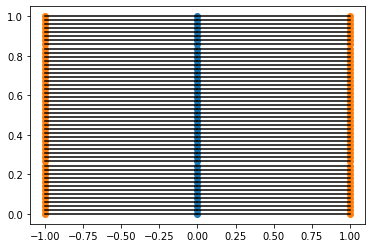

In [83]:
G = optimal_plan

mx = G.max()
for i in range(x.shape[0]):
    for j in range(y.shape[0]):
        plt.plot([x[i, 0], y[j, 0]], [x[i, 1], y[j, 1]],
                alpha = G[i, j] / mx, color = 'k')
plt.scatter(x[:, 0], x[:, 1])
plt.scatter(y[:, 0], y[:, 1])
plt.show()